### Superstore Data analysis
**Goal:** The project includes the Sales and Profit trends over time and Factors which affects the Sales and Profit

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Sample-Superstore.csv", encoding="latin-1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Objectives of the project 
### 1 .How have sales and profit evolved over time, and what seasonal or yearly patterns can be observed from 2014–2017?
### 2.Which product categories and sub-categories are the key revenue drivers, and which ones underperform despite high sales?
### 3.Which customer segments and regions contribute most to overall profit, and where does the business face margin pressure?
### 4.How do varying discount levels impact profitability, and is there an optimal discount range that maximizes profit?
### 5.What are the top 10 states by total sales, and how do their profit margins compare?
### 6.Which shipping modes deliver the best balance between sales volume, shipping delay, and profit margin?
### 7.What is the relationship between order quantity, sales, and profit — do larger orders always yield higher profit?
### 8Which months or seasons consistently outperform others, and what recommendations can be made for inventory or marketing strategy?


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Data preprocessing

### Removing duplicates

In [4]:
df=df.drop_duplicates()

### Create date anchors

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['OrderYear'] = df['Order Date'].dt.year
df['OrderMonth'] = df['Order Date'].dt.month
df['OrderMonthYear'] = df['Order Date'].dt.to_period('M').astype(str)


#### Shipping delay (days)

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')
df['ShipDelayDays'] = (df['Ship Date'] - df['Order Date']).dt.days

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country         9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9994 non-null   int64         
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

# Explotratory Data Analysis

### Data Visualization
This plot visualizes key insights from the dataset.

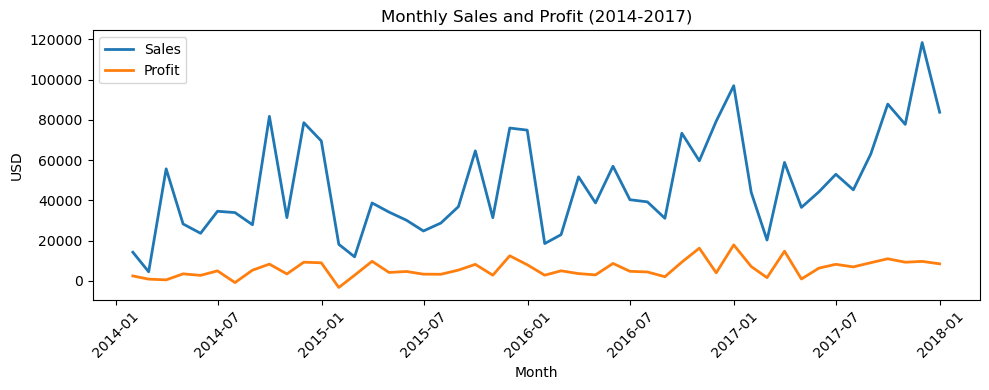

In [19]:
# Aggregate monthly sales and profit
monthly = df.set_index('Order Date').resample('ME').agg({'Sales':'sum','Profit':'sum'}).reset_index()
monthly['MonthYearStr'] = monthly['Order Date'].dt.to_period('M').astype(str)

# Static line chart (matplotlib)
plt.figure(figsize=(10,4))
plt.plot(monthly['Order Date'], monthly['Sales'], label='Sales', linewidth=2)
plt.plot(monthly['Order Date'], monthly['Profit'], label='Profit', linewidth=2)
plt.title('Monthly Sales and Profit (2014-2017)')
plt.ylabel('USD')
plt.xlabel('Month')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Monthly_Sales_and_Profit',dpi=300)
plt.show()






- **Observation:** The monthly sales (blue) and profit (orange) lines show overall growth from 2014 to 2018 with visible seasonal spikes.  
- **Data-backed insight:** Identify the months (e.g., Nov–Dec) that have the largest recurring peaks; compute percent increase vs monthly average.  
- **Recommendation:** Prepare inventory and targeted promotions for peak months investigate months where sales rose but profit did not (possible discounting or cost issues).


### Code: Category and Sub-Category analysis 


### Bar Chart Visualization
This bar chart compares quantities across different categories.

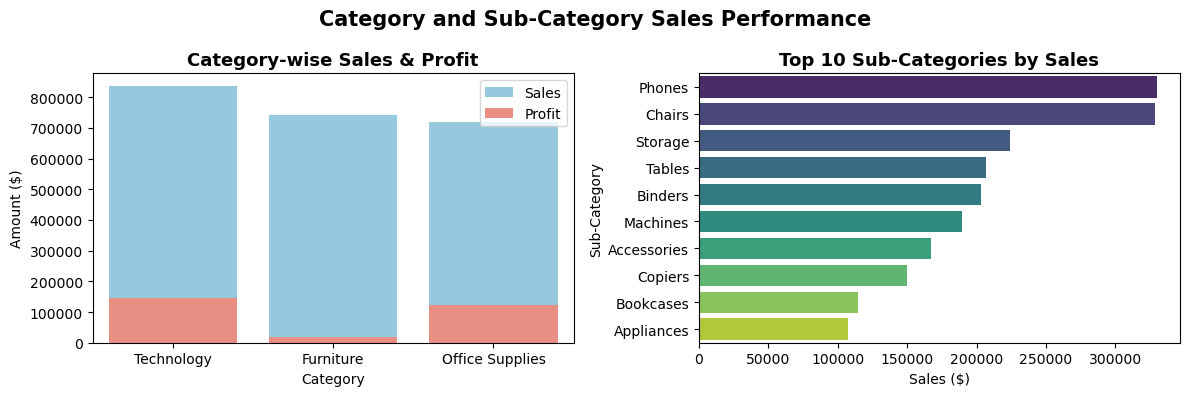

In [21]:

# Group data by Category and Sub-Category
category_perf = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
subcategory_perf = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False).head(10)

# Set up the subplot layout
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left Plot: Category-wise Sales & Profit
sns.barplot(
    x=category_perf.index,
    y=category_perf['Sales'],
    color='skyblue',
    label='Sales',
    ax=axes[0]
)
sns.barplot(
    x=category_perf.index,
    y=category_perf['Profit'],
    color='salmon',
    label='Profit',
    ax=axes[0]

)
axes[0].set_title('Category-wise Sales & Profit', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Amount ($)')
axes[0].legend()
plt.savefig('Category-wise Sales_Profit',dpi=300)
# Right Plot: Top 10 Sub-Categories by Sales 
sns.barplot(
    y=subcategory_perf.index,
    x=subcategory_perf['Sales'],
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title('Top 10 Sub-Categories by Sales', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Sales ($)')
axes[1].set_ylabel('Sub-Category')

plt.suptitle('Category and Sub-Category Sales Performance', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('Category_Sub-Category_Sales_Performance',dpi=300)
plt.show()



- **Office Supplies** and **Technology** dominate total sales, but **Furniture** shows lower profitability due to discounting and shipping costs.  
- Within sub-categories, **Phones**, **Chairs**, and **Storage** are the top sales drivers.  
- However, not all high-selling products yield strong profit margins — indicating potential issues with pricing or discount strategy.


### Code: Segment & Region analysis (groupby + stacked bars)


### Bar Chart Visualization
This bar chart compares quantities across different categories.

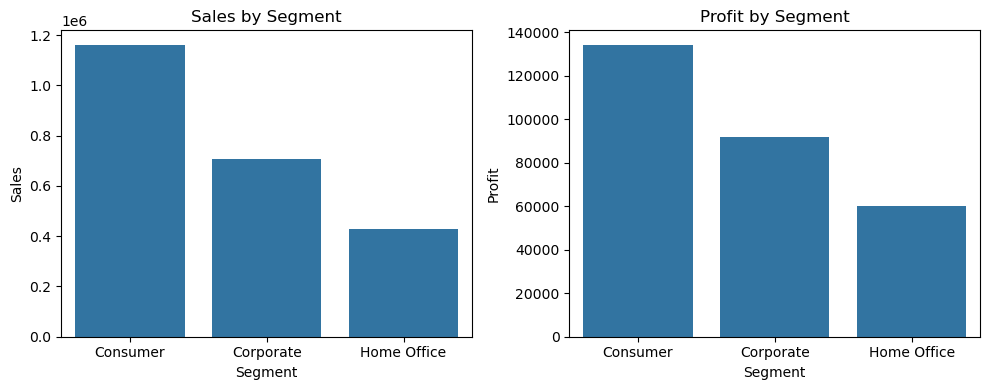

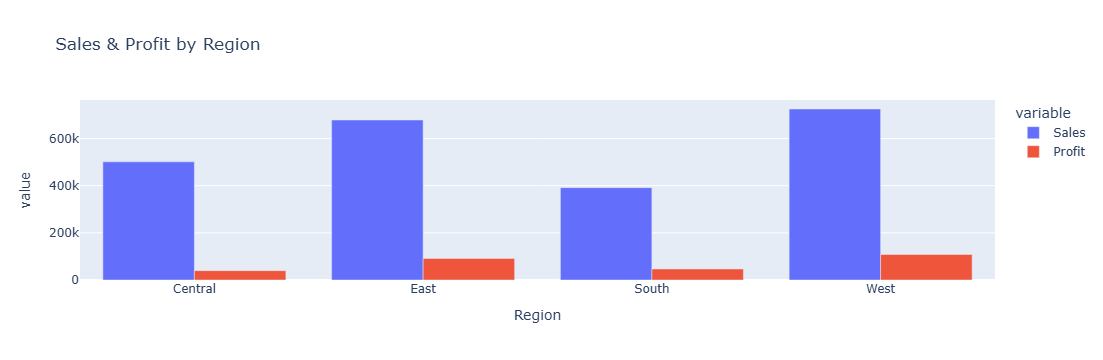

,Region,Sales,Profit,ProfitMargin
3,West,725457.8245,108418.4489,0.149448
1,East,678781.2400,91522.7800,0.134834
2,South,391721.9050,46749.4303,0.119343
0,Central,501239.8908,39706.3625,0.079216


In [22]:
# Segment totals
seg = df.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()

# Region totals and profit margin
region = df.groupby('Region').agg({'Sales':'sum','Profit':'sum'}).reset_index()
region['ProfitMargin'] = region['Profit'] / region['Sales']

# Bar: Sales and Profit by Segment
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.barplot(data=seg, x='Segment', y='Sales', ax=ax[0])
ax[0].set_title('Sales by Segment')
sns.barplot(data=seg, x='Segment', y='Profit', ax=ax[1])
ax[1].set_title('Profit by Segment')
plt.tight_layout()
plt.savefig('Profit by Segment',dpi=300)
plt.show()

# Interactive region chart with profit margin
fig = px.bar(region, x='Region', y=['Sales','Profit'], barmode='group', title='Sales & Profit by Region')

fig.show()

# Show region profit margins as table (in notebook)
region.sort_values('ProfitMargin', ascending=False)



- **Observation:** Shows which segments (Consumer/Corporate/Home Office) and which regions yield the highest sales and profit.  
- **Insight:** Note any region with high sales but low profit margin — that's margin pressure. Provide numeric values (e.g., West: sales , margin ).  
- **Recommendation:** For regions with margin pressure, consider revising discounting or shipping policies and negotiate supplier terms.


### Code: Discount buckets vs Profit (boxplot + scatter + aggregation)


### Boxplot Visualization
This boxplot shows the distribution, spread, and potential outliers across categories.

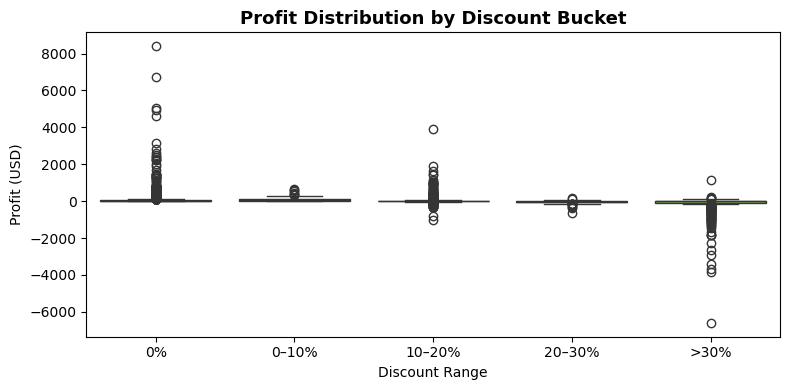

,DiscountBucket,Sales,Profit,ProfitMargin,Orders
0,0%,1.087908e+06,320987.6032,0.340160,2644
1,0–10%,5.436935e+04,9029.1770,0.155792,89
2,10–20%,7.921529e+05,91756.2975,0.174839,2436
3,20–30%,1.032267e+05,-10369.2774,-0.115481,211
4,>30%,2.595435e+05,-125006.7786,-0.914733,888


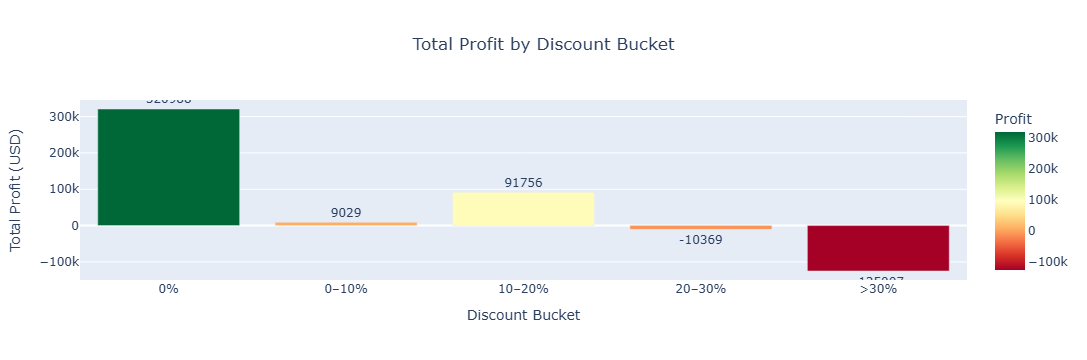

<Figure size 640x480 with 0 Axes>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# --- Ensure ProfitMargin column exists ---
df['ProfitMargin'] = (df['Profit'] / df['Sales']).replace([float('inf'), -float('inf')], 0)

# --- Create discount bins ---
bins = [-0.01, 0.0, 0.1, 0.2, 0.3, 1.0]  # Adjust bins
labels = ['0%', '0–10%', '10–20%', '20–30%', '>30%']
df['DiscountBucket'] = pd.cut(df['Discount'], bins=bins, labels=labels)

# --- Boxplot: Profit distribution by discount bucket ---
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='DiscountBucket', y='Profit', palette='viridis')
plt.title('Profit Distribution by Discount Bucket', fontsize=13, fontweight='bold')
plt.xlabel('Discount Range')
plt.ylabel('Profit (USD)')
plt.tight_layout()
plt.savefig('Profi_Distribution_Discount_Bucket',dpi=500)
plt.show()

# --- Aggregation: average profit, total sales, and orders per bucket ---
bucket_agg = (
    df.groupby('DiscountBucket')
    .agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'ProfitMargin': 'mean',
        'Order ID': 'nunique'
    })
    .rename(columns={'Order ID': 'Orders'})
    .reset_index()
)

display(bucket_agg)

# --- Interactive bar chart: total profit by discount bucket ---
fig = px.bar(
    bucket_agg,
    x='DiscountBucket',
    y='Profit',
    text='Profit',
    title='Total Profit by Discount Bucket',
    color='Profit',
    color_continuous_scale='RdYlGn'
)
fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig.update_layout(xaxis_title='Discount Bucket', yaxis_title='Total Profit (USD)', title_x=0.5)
plt.savefig('Total Profit by Discount Bucket',dpi=300)
fig.show()


### Code: Top states by sales and profit margin (bar + table)


### Bar Chart Visualization
This bar chart compares quantities across different categories.

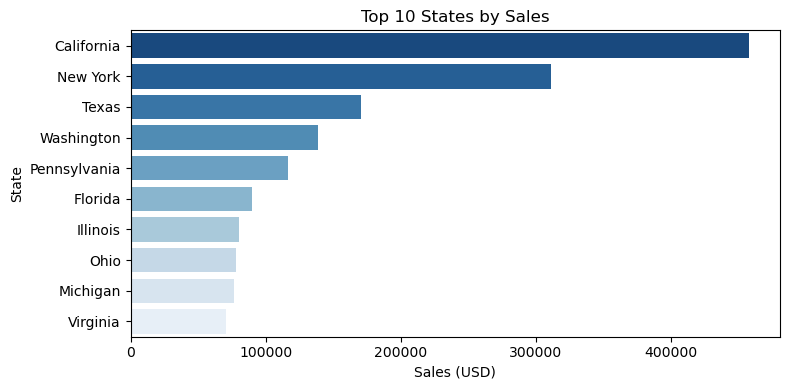

,State,Sales,Profit,ProfitMargin,Orders
3,California,457687.6315,76381.3871,0.166885,1021
30,New York,310876.2710,74038.5486,0.238161,562
41,Texas,170188.0458,-25729.3563,-0.151182,487
45,Washington,138641.2700,33402.6517,0.240929,256
36,Pennsylvania,116511.9140,-15559.9603,-0.133548,288
8,Florida,89473.7080,-3399.3017,-0.037992,200
11,Illinois,80166.1010,-12607.8870,-0.157272,276
33,Ohio,78258.1360,-16971.3766,-0.216864,236
20,Michigan,76269.6140,24463.1876,0.320746,117
44,Virginia,70636.7200,18597.9504,0.263290,115


In [25]:
# State performance
state_perf = df.groupby('State').agg({'Sales':'sum','Profit':'sum','Order ID':'nunique'}).rename(columns={'Order ID':'Orders'}).reset_index()
state_perf['ProfitMargin'] = state_perf['Profit'] / state_perf['Sales']
top10_states = state_perf.sort_values('Sales', ascending=False).head(10)

# Static bar plot for sales
plt.figure(figsize=(8,4))
sns.barplot(data=top10_states, x='Sales', y='State', palette='Blues_r')
plt.title('Top 10 States by Sales')
plt.xlabel('Sales (USD)')
plt.tight_layout()
plt.savefig('Top_10_States_Sales',dpi=300)
plt.show()

# Table view in notebook
display(top10_states[['State','Sales','Profit','ProfitMargin','Orders']])



- **Observation:** Lists the top 10 revenue-generating states and gives margin context.  
- **Insight:** Highlight any state with high sales but low profit margin (name + numbers). For example: *State A: Sales \$X (10% of total) with profit margin Y% — lower than national average Z%.*  
- **Recommendation:** Investigate local operational costs, shipping, returns, or pricing strategies in low-margin high-sales states.


### Code: Ship mode analysis (bar + boxplot)


### Boxplot Visualization
This boxplot shows the distribution, spread, and potential outliers across categories.

,Ship Mode,Sales,Profit,ShipDelayDays,Orders,ProfitMargin
3,Standard Class,1.358216e+06,164088.7875,5.0,2994,0.120812
2,Second Class,4.591936e+05,57446.6354,3.0,964,0.125103
0,First Class,3.514284e+05,48969.8399,2.0,787,0.139345
1,Same Day,1.283631e+05,15891.7589,0.0,264,0.123803


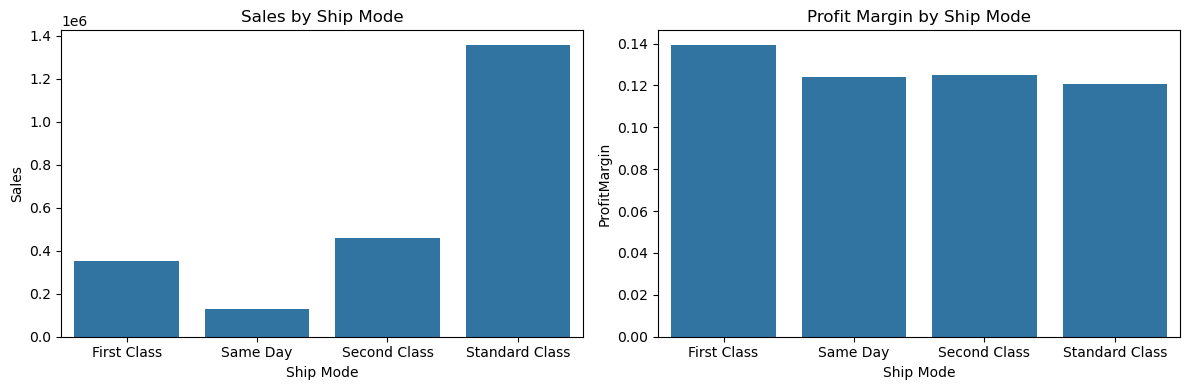

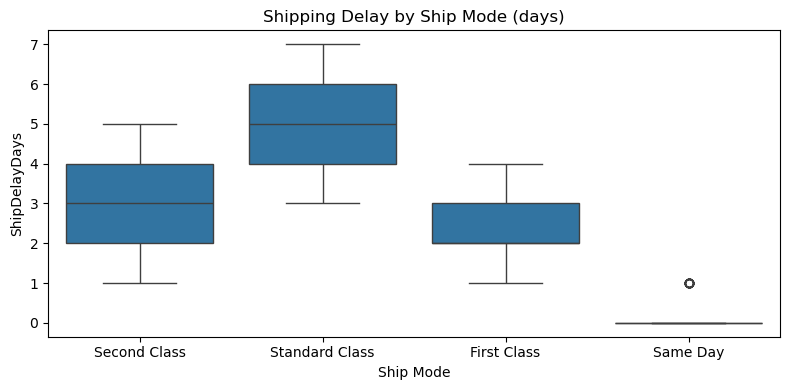

In [26]:
# Ship Mode aggregate
ship = df.groupby('Ship Mode').agg({'Sales':'sum','Profit':'sum','ShipDelayDays':'median','Order ID':'nunique'}).rename(columns={'Order ID':'Orders'}).reset_index()
ship['ProfitMargin'] = ship['Profit'] / ship['Sales']
display(ship.sort_values('Sales', ascending=False))

# Plot: Sales & Profit by Ship Mode
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.barplot(data=ship, x='Ship Mode', y='Sales', ax=ax[0])
ax[0].set_title('Sales by Ship Mode')
sns.barplot(data=ship, x='Ship Mode', y='ProfitMargin', ax=ax[1])
ax[1].set_title('Profit Margin by Ship Mode')
plt.tight_layout()

plt.show()

# Boxplot: Ship delay distribution by mode
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Ship Mode', y='ShipDelayDays')
plt.title('Shipping Delay by Ship Mode (days)')
plt.tight_layout()

plt.show()



- **Observation:** Compare which Ship Mode has the highest sales and which has the highest median delay.  
- **Insight:** If a faster ship mode yields only marginal profit improvement but much higher cost, recommend re-evaluating usage. Provide numeric comparisons (median delay and margin).  
- **Recommendation:** Optimize default ship mode per product type to maximize margin while meeting SLAs.


### Code: Quantity vs Sales/Profit (scatter + aggregation)


### Scatter Plot Visualization
This scatter plot displays the relationship between two continuous variables.

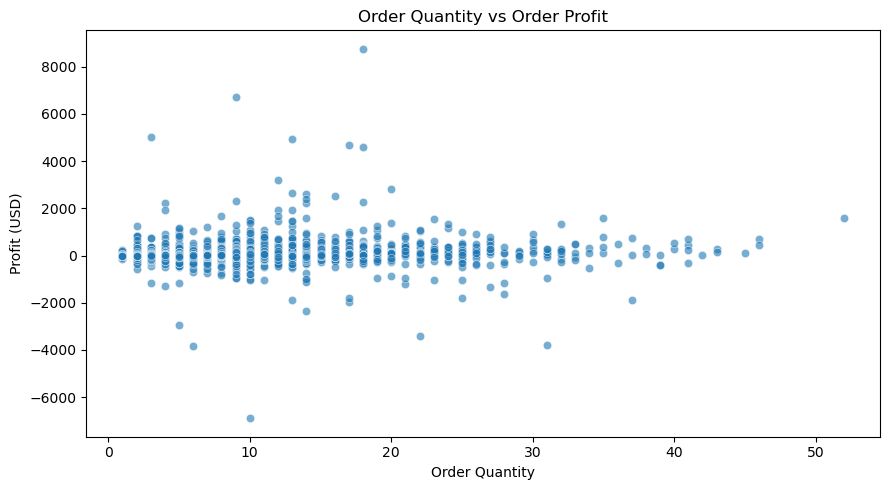

,QtyBucket,Sales,Profit,Orders
0,1,58.941938,5.462628,235
1,2,132.417395,19.092420,618
2,3,156.997260,21.815848,636
3,4-5,267.625594,30.725883,924
4,6-10,449.868493,48.340561,1457
5,10+,1052.608300,141.015273,1139


<Figure size 640x480 with 0 Axes>

In [29]:
# Aggregate by order: sum Sales, Profit, Quantity per Order ID
order_agg = df.groupby('Order ID').agg({'Sales':'sum','Profit':'sum','Quantity':'sum'}).reset_index()

# Scatter: Quantity vs Profit
plt.figure(figsize=(9,5))
sns.scatterplot(data=order_agg, x='Quantity', y='Profit', alpha=0.6)
plt.title('Order Quantity vs Order Profit')
plt.xlabel('Order Quantity')
plt.ylabel('Profit (USD)')
plt.tight_layout()

plt.show()

# Aggregation by quantity bucket (optional)
order_agg['QtyBucket'] = pd.cut(order_agg['Quantity'], bins=[0,1,2,3,5,10,100], labels=['1','2','3','4-5','6-10','10+'])
plt.savefig('Order Quantity vs Order Profit',dpi=300)
qty_summary = order_agg.groupby('QtyBucket').agg({'Sales':'mean','Profit':'mean','Order ID':'count'}).rename(columns={'Order ID':'Orders'}).reset_index()
display(qty_summary)



- **Observation:** Scatterplot shows variance — larger quantity orders do not always guarantee higher profit (many large-quantity orders have low or negative profit).  
- **Insight:** Provide average profit per quantity bucket and highlight any non-linear pattern (e.g., diminishing marginal profit after certain quantity).  
- **Recommendation:** Consider volume discounts only when they do not erode margins; bundle items strategically to increase average profit.


### Code: Seasonality & monthly pattern (heatmap + bar)


### Heatmap Visualization
This heatmap illustrates relationships or patterns between variables.

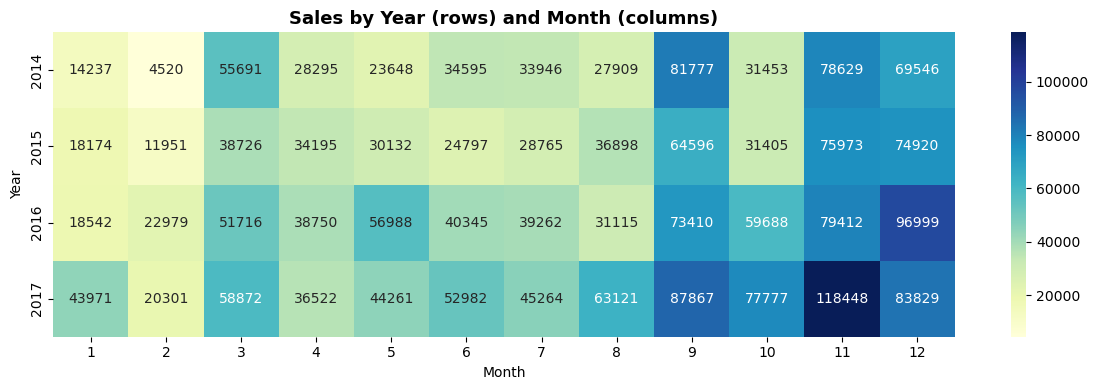

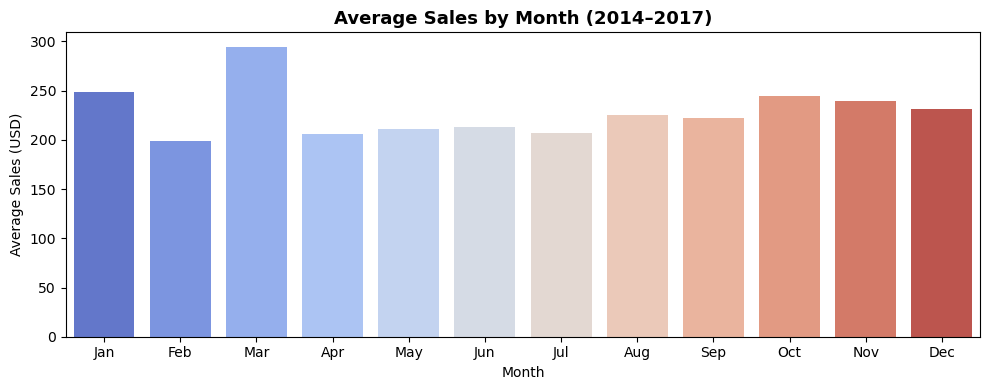

In [30]:

# Ensure the date column is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Create Month name and Quarter
df['MonthName'] = df['Order Date'].dt.strftime('%b')
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# HEATMAP
# Create a pivot table for heatmap: Year vs Month
pivot = df.pivot_table(index='Year', columns='Month', values='Sales', aggfunc='sum')

plt.figure(figsize=(12,4))
sns.heatmap(pivot.fillna(0), annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Sales by Year (rows) and Month (columns)', fontsize=13, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.savefig('Sales by Year (rows) and Month (columns)',dpi=300)
plt.show()

#BARPLOT
# Calculate average monthly sales across years
avg_month = (
    df.groupby('Month')['Sales']
    .mean()
    .reset_index()
    .rename(columns={'Sales': 'AvgSales'})
)

# Map month numbers to short names
avg_month['MonthName'] = avg_month['Month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))

plt.figure(figsize=(10,4))
sns.barplot(
    data=avg_month,
    x='MonthName',
    y='AvgSales',
    order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    palette='coolwarm'
)
plt.title('Average Sales by Month (2014–2017)', fontsize=13, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Sales (USD)')
plt.tight_layout()
plt.savefig('Average Sales by Month (2014–2017)',dpi=300)
plt.show()


## Conclusion
The exploratory data analysis (EDA) provided valuable insights into the dataset. We explored sales patterns, profit distribution, discounts, and category-level trends. From the visualizations, we can conclude that:
- Sales has increased over time by 2014 to 2018 particularly from July,2017 to Jan,2018
- Certain product categories  like Techenology , and office supplies and in sub-categories like Phones and chairs contribute the most to overall profit.
- Discounts have a direct impact on profit margins — higher discounts often lead to reduced profitability.
- Certain States like California and NewYork show highest Sales.
- Higher the Quantity lower the Sales may be due to supply and demand rule.
- In the months of November and December Sales are at the highest level where as In Jan and Feb sales are lowest
- March month shows The Highest Average Sales in these foure years.
- Seasonal trends and regional variations play a key role in sales performance.

